In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

# Application

In the third and final portion of project 2 I applied what I learned in part 2 of newtons method to the non linear equation $$e\sin(w) - w = t$$ where $e= \sqrt{1 - \frac{b^2}{a^2}}$, $t$ is time and $w$ is the angle around the orbit. To use Newton's root finding method I simplified the equation to $$e\sin(w) - w - t = 0$$ and $e$ becomes $\sqrt{1-\frac{1.25^2}{2.0^2}}$. To solve the function for $f(w)$ some additonal functionality must be added to the Kepler class equation. Time must be changed for each seprate running of newtons method without time being passed as a paramater. I solved this issue with an array of the values and a counter inside the Kepler equation class. After each sucessful completion of newtons method. I incremented the time counter by one and found the next time to be used. To strat the newtons method solve I used $w=0$ for the first iteration and used the resultant $w$ for the subsequent newton's method calls. Once $w$ was found from the equation $$e\sin(w) - w - t_i = 0$$ I was able to find the radial position of the object with the function $$r(w) = \frac{ab}{\sqrt{(b\cos(w))^2 + (a\sin(w))^2}}$$ Finally I was able to find the cartesian coordinates of the object at time t with the functions $x(t) = r\cos(w)$ and $y(t) = r\sin(2)$. Finally I loaded the t value and the (x,y) coordinate into respective files named **t.txt**, **x.txt**, **y.txt**.

In [3]:
t = open("t.txt").read();
t = t.split("\n");
t.remove("");

x = open("x.txt").read();
x = x.split("\n");
x.remove("");

y = open("y.txt").read();
y = y.split("\n");
y.remove("");

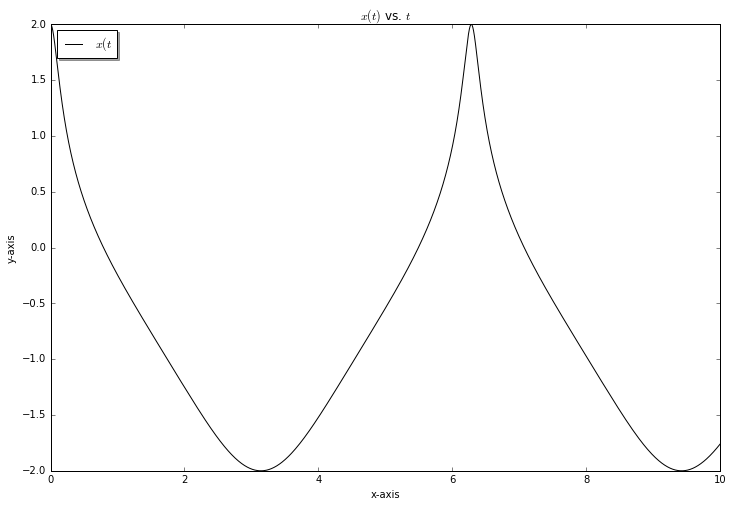

In [5]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(x,t,"k-", label="$x(t$")
ax.set_title("$x(t)$ vs. $t$")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

legendPlot1 = ax.legend(loc="upper left", shadow=True)

plt.show()

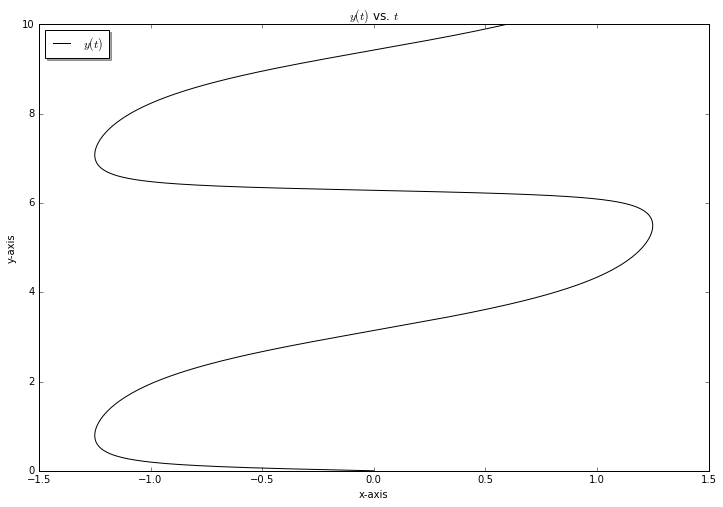

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(y,t,"k-", label="$y(t)$")
ax.set_title("$y(t)$ vs. $t$")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

legendPlot1 = ax.legend(loc="upper left", shadow=True)

plt.show()

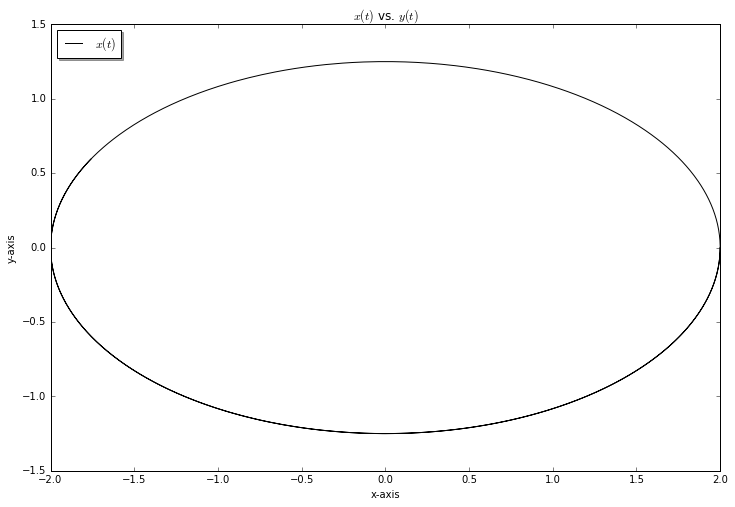

In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(x,y,"k-", label="$x(t)$")
ax.set_title("$x(t)$ vs. $y(t)$")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

legendPlot1 = ax.legend(loc="upper left", shadow=True)

plt.show()

When our cartiantion points are graphed in relation to each other (not in relation to time) the orbit of our object becomes visable. This really shows the power of computatonal science because thousands of equations were solved to generate the cooridiates for this graph and without optimizations and newton's quadratitcal convergence the solution would be much more difficult to compute.

In [1]:
%cat kepler.cpp

/* Project - Project 2_Part c
 * Prof - Dr Xu
 * Name - Jake Rowland
 * Date - 10/6/16
 * Purpuse - Use Newton's method of root finding for orbital path prediction
*/

#include <cmath>
#include <iostream>
#include <fstream>

#include "fcn.hpp"
#include "newton.cpp"

//Create the function f(x) = e * sin(w) - w - t
class Kepler: public Fcn
{
private:
	//define variables needed for each iteration of f(x)
	double t[10001];
	double e;
	int run;

	//Function to find all values of t
	void defT()
	{
		std::ofstream tOut("t.txt", std::ios::out);
		for(int i = 0; i < 10001; i++)
		{
			t[i] = (double)i / 1000;
			tOut << t[i] << "\n";
		}
	}

public:
	//Constructor to create constant e
	Kepler(double a, double b)
	{
		e = sqrt(1 - (pow(b,2)/pow(a,2)));
		run = 0;
		defT();
	}

	//Operation that calculates the fuction f(x)
	double operator()(double w)
	{
		return e * sin(w) - w - t[run];
	}

	//Increment run for next run
	void runIncr()
	{
		run = run + 1;
	}
};

//Derivative of f(x)
class Kepler